In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from models import MergeRareCategories
from pipelines import pipeline_Freeman
from source import read_preprocessed_data
from transform import load_process_and_store_spreadsheets, survival_histograms
from views import categorical_signal_summary, plot_confusion_matrix, view_as_exponential, view_decision_tree_julian, view_linear_model_richard, view_linear_model_julian

In [25]:
random_state=1234

In [26]:
def harmonic_mean(t0, t1):
    return t0 * t1 / (t0 + t1)

In [27]:
load_process_and_store_spreadsheets(
#     spread_sheet_filename='2019-08-27_PLASMA_SOMATIC_Results_Groningen.xlsx', 
    transformation=harmonic_mean,
)

X_train, y_train = read_preprocessed_data("output/train.tsv")
X_test, y_test = read_preprocessed_data("output/test.tsv")

In [28]:
elasticnet_Freeman_parameters = {
    "random_state": random_state,
    "max_iter": 1000,
}

elasticnet_Freeman_hyper_parameters = {
    "transform_columns__age_discretizer__n_bins": (2, 3, 4, 5, 6),
    "filter_rare_mutations__top_k_features": (4, 5, 6, 7, 8, 10, 12, 24, 48),
    "estimator__l1_ratio": (0.025, 0.05, 0.12, 0.25, 0.38, 0.45, 0.5, 0.55, 0.63, 0.75, 0.87, 1.0),
    "estimator__alpha": (0.13, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 2.5, 4.0, 6.0, 8.0, 10.0, 16.0, 32.0, 64.0),
}

In [29]:
from sklearn.linear_model import ElasticNet
elastic_Freeman = pipeline_Freeman(ElasticNet, **elasticnet_Freeman_parameters)
regr = GridSearchCV(elastic_Freeman, elasticnet_Freeman_hyper_parameters, scoring='neg_mean_squared_error', n_jobs=8, cv=5)

In [7]:
regr.fit(X_train, y_train['OS_days'])

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('filter_rare_mutations',
                                        SparseFeatureFilter(columns_to_consider=['TP53',
                                                                                 'KRAS',
                                                                                 'FGFR1',
                                                                                 'PTEN',
                                                                                 'FBXW7',
                                                                                 'KDR',
                                                                                 'MTOR',
                                                                                 'EGFR',
                                                                                 'MET',
                                     

In [8]:
print("Best parameters set found on development set:")
print()
print(regr.best_params_)
print()
print("Grid scores on development set:")
print()
means = regr.cv_results_['mean_test_score']
stds = regr.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, regr.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
print()


Best parameters set found on development set:

{'estimator__alpha': 0.5, 'estimator__l1_ratio': 0.05, 'filter_rare_mutations__top_k_features': 24, 'transform_columns__age_discretizer__n_bins': 3}

Grid scores on development set:

-98060.136 (+/-26526.501) for {'estimator__alpha': 0.13, 'estimator__l1_ratio': 0.025, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 2}
-97208.012 (+/-37502.742) for {'estimator__alpha': 0.13, 'estimator__l1_ratio': 0.025, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 3}
-97658.807 (+/-30398.773) for {'estimator__alpha': 0.13, 'estimator__l1_ratio': 0.025, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 4}
-97504.752 (+/-32464.390) for {'estimator__alpha': 0.13, 'estimator__l1_ratio': 0.025, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 5}
-97627.504 (+/-35922.633) for {'estimator__alpha':

-96245.230 (+/-28806.459) for {'estimator__alpha': 0.5, 'estimator__l1_ratio': 0.38, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 2}
-95394.842 (+/-33861.948) for {'estimator__alpha': 0.5, 'estimator__l1_ratio': 0.38, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 3}
-96095.927 (+/-30675.512) for {'estimator__alpha': 0.5, 'estimator__l1_ratio': 0.38, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 4}
-95635.385 (+/-31532.964) for {'estimator__alpha': 0.5, 'estimator__l1_ratio': 0.38, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 5}
-95856.193 (+/-33339.093) for {'estimator__alpha': 0.5, 'estimator__l1_ratio': 0.38, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 6}
-96244.529 (+/-28805.682) for {'estimator__alpha': 0.5, 'estimator__l1_ratio': 0.38, 'filter_rare_mutations__t

-95525.075 (+/-31189.976) for {'estimator__alpha': 1.0, 'estimator__l1_ratio': 0.55, 'filter_rare_mutations__top_k_features': 48, 'transform_columns__age_discretizer__n_bins': 5}
-95734.594 (+/-32479.196) for {'estimator__alpha': 1.0, 'estimator__l1_ratio': 0.55, 'filter_rare_mutations__top_k_features': 48, 'transform_columns__age_discretizer__n_bins': 6}
-96122.000 (+/-29269.721) for {'estimator__alpha': 1.0, 'estimator__l1_ratio': 0.63, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 2}
-95266.577 (+/-33247.805) for {'estimator__alpha': 1.0, 'estimator__l1_ratio': 0.63, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 3}
-96014.083 (+/-30703.157) for {'estimator__alpha': 1.0, 'estimator__l1_ratio': 0.63, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 4}
-95575.356 (+/-31360.710) for {'estimator__alpha': 1.0, 'estimator__l1_ratio': 0.63, 'filter_rare_mutations_

-98611.058 (+/-31386.248) for {'estimator__alpha': 2.5, 'estimator__l1_ratio': 0.05, 'filter_rare_mutations__top_k_features': 6, 'transform_columns__age_discretizer__n_bins': 2}
-98239.344 (+/-31638.187) for {'estimator__alpha': 2.5, 'estimator__l1_ratio': 0.05, 'filter_rare_mutations__top_k_features': 6, 'transform_columns__age_discretizer__n_bins': 3}
-98708.805 (+/-31370.078) for {'estimator__alpha': 2.5, 'estimator__l1_ratio': 0.05, 'filter_rare_mutations__top_k_features': 6, 'transform_columns__age_discretizer__n_bins': 4}
-98563.599 (+/-31213.619) for {'estimator__alpha': 2.5, 'estimator__l1_ratio': 0.05, 'filter_rare_mutations__top_k_features': 6, 'transform_columns__age_discretizer__n_bins': 5}
-98708.224 (+/-31489.826) for {'estimator__alpha': 2.5, 'estimator__l1_ratio': 0.05, 'filter_rare_mutations__top_k_features': 6, 'transform_columns__age_discretizer__n_bins': 6}
-98611.047 (+/-31386.239) for {'estimator__alpha': 2.5, 'estimator__l1_ratio': 0.05, 'filter_rare_mutations__t

-100206.847 (+/-31619.345) for {'estimator__alpha': 6.0, 'estimator__l1_ratio': 0.25, 'filter_rare_mutations__top_k_features': 7, 'transform_columns__age_discretizer__n_bins': 6}
-100141.207 (+/-31638.009) for {'estimator__alpha': 6.0, 'estimator__l1_ratio': 0.25, 'filter_rare_mutations__top_k_features': 8, 'transform_columns__age_discretizer__n_bins': 2}
-99918.321 (+/-31712.628) for {'estimator__alpha': 6.0, 'estimator__l1_ratio': 0.25, 'filter_rare_mutations__top_k_features': 8, 'transform_columns__age_discretizer__n_bins': 3}
-100206.129 (+/-31599.805) for {'estimator__alpha': 6.0, 'estimator__l1_ratio': 0.25, 'filter_rare_mutations__top_k_features': 8, 'transform_columns__age_discretizer__n_bins': 4}
-100126.314 (+/-31508.381) for {'estimator__alpha': 6.0, 'estimator__l1_ratio': 0.25, 'filter_rare_mutations__top_k_features': 8, 'transform_columns__age_discretizer__n_bins': 5}
-100206.847 (+/-31619.345) for {'estimator__alpha': 6.0, 'estimator__l1_ratio': 0.25, 'filter_rare_mutatio

-100649.487 (+/-31583.319) for {'estimator__alpha': 10.0, 'estimator__l1_ratio': 0.5, 'filter_rare_mutations__top_k_features': 8, 'transform_columns__age_discretizer__n_bins': 6}
-100618.890 (+/-31582.221) for {'estimator__alpha': 10.0, 'estimator__l1_ratio': 0.5, 'filter_rare_mutations__top_k_features': 10, 'transform_columns__age_discretizer__n_bins': 2}
-100433.025 (+/-31640.875) for {'estimator__alpha': 10.0, 'estimator__l1_ratio': 0.5, 'filter_rare_mutations__top_k_features': 10, 'transform_columns__age_discretizer__n_bins': 3}
-100660.804 (+/-31553.486) for {'estimator__alpha': 10.0, 'estimator__l1_ratio': 0.5, 'filter_rare_mutations__top_k_features': 10, 'transform_columns__age_discretizer__n_bins': 4}
-100602.222 (+/-31515.157) for {'estimator__alpha': 10.0, 'estimator__l1_ratio': 0.5, 'filter_rare_mutations__top_k_features': 10, 'transform_columns__age_discretizer__n_bins': 5}
-100649.487 (+/-31583.319) for {'estimator__alpha': 10.0, 'estimator__l1_ratio': 0.5, 'filter_rare_mu

-102024.675 (+/-31789.891) for {'estimator__alpha': 32.0, 'estimator__l1_ratio': 0.87, 'filter_rare_mutations__top_k_features': 7, 'transform_columns__age_discretizer__n_bins': 4}
-102024.892 (+/-31795.485) for {'estimator__alpha': 32.0, 'estimator__l1_ratio': 0.87, 'filter_rare_mutations__top_k_features': 7, 'transform_columns__age_discretizer__n_bins': 5}
-102024.892 (+/-31795.485) for {'estimator__alpha': 32.0, 'estimator__l1_ratio': 0.87, 'filter_rare_mutations__top_k_features': 7, 'transform_columns__age_discretizer__n_bins': 6}
-102014.634 (+/-31832.462) for {'estimator__alpha': 32.0, 'estimator__l1_ratio': 0.87, 'filter_rare_mutations__top_k_features': 8, 'transform_columns__age_discretizer__n_bins': 2}
-101956.143 (+/-31807.692) for {'estimator__alpha': 32.0, 'estimator__l1_ratio': 0.87, 'filter_rare_mutations__top_k_features': 8, 'transform_columns__age_discretizer__n_bins': 3}
-102024.675 (+/-31789.891) for {'estimator__alpha': 32.0, 'estimator__l1_ratio': 0.87, 'filter_rare_

In [9]:
from sklearn.metrics import mean_squared_error
y_true, y_pred = y_test['OS_days'], regr.predict(X_test)
print(mean_squared_error(y_true, y_pred)**0.5)


276.6250241980241


In [10]:
randomforest_Freeman_parameters = {
    "random_state": random_state,
    "class_weight": "balanced_subsample",
}

randomforest_Freeman_hyper_parameters = {
    "transform_columns__age_discretizer__n_bins": (2, 3, 4, 5),
    "filter_rare_mutations__top_k_features": (4, 5, 6, 7, 8, 10, 12, 18, 24, 48),
    "estimator__n_estimators": [2, 4, 8, 12, 15, 30, 60],
#     'estimator__learning_rate': [0.005, 0.01, 0.025, 0.05, 0.1, 0.2, 0.4],
#     "estimator__min_samples_split": [1, 2, 3, 4],
    "estimator__max_depth": [3, 4, 5, 6, 7],
}

In [11]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
rf_Freeman = pipeline_Freeman(RandomForestClassifier, **randomforest_Freeman_parameters)
clf_search = GridSearchCV(rf_Freeman, randomforest_Freeman_hyper_parameters, scoring='roc_auc', n_jobs=8, cv=5)

In [12]:
clf_search.fit(X_train, y_train['response_grouped'])

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('filter_rare_mutations',
                                        SparseFeatureFilter(columns_to_consider=['TP53',
                                                                                 'KRAS',
                                                                                 'FGFR1',
                                                                                 'PTEN',
                                                                                 'FBXW7',
                                                                                 'KDR',
                                                                                 'MTOR',
                                                                                 'EGFR',
                                                                                 'MET',
                                     

In [13]:
from sklearn.metrics import classification_report
print("Best parameters set found on development set:")
print()
print(clf_search.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf_search.cv_results_['mean_test_score']
stds = clf_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best parameters set found on development set:

{'estimator__max_depth': 4, 'estimator__n_estimators': 12, 'filter_rare_mutations__top_k_features': 12, 'transform_columns__age_discretizer__n_bins': 4}

Grid scores on development set:

0.470 (+/-0.227) for {'estimator__max_depth': 3, 'estimator__n_estimators': 2, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 2}
0.466 (+/-0.151) for {'estimator__max_depth': 3, 'estimator__n_estimators': 2, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 3}
0.619 (+/-0.121) for {'estimator__max_depth': 3, 'estimator__n_estimators': 2, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 4}
0.548 (+/-0.303) for {'estimator__max_depth': 3, 'estimator__n_estimators': 2, 'filter_rare_mutations__top_k_features': 4, 'transform_columns__age_discretizer__n_bins': 5}
0.439 (+/-0.239) for {'estimator__max_depth': 3, 'estimator__n_estimators': 2,

0.684 (+/-0.216) for {'estimator__max_depth': 7, 'estimator__n_estimators': 12, 'filter_rare_mutations__top_k_features': 10, 'transform_columns__age_discretizer__n_bins': 5}
0.584 (+/-0.123) for {'estimator__max_depth': 7, 'estimator__n_estimators': 12, 'filter_rare_mutations__top_k_features': 12, 'transform_columns__age_discretizer__n_bins': 2}
0.610 (+/-0.152) for {'estimator__max_depth': 7, 'estimator__n_estimators': 12, 'filter_rare_mutations__top_k_features': 12, 'transform_columns__age_discretizer__n_bins': 3}
0.673 (+/-0.237) for {'estimator__max_depth': 7, 'estimator__n_estimators': 12, 'filter_rare_mutations__top_k_features': 12, 'transform_columns__age_discretizer__n_bins': 4}
0.501 (+/-0.333) for {'estimator__max_depth': 7, 'estimator__n_estimators': 12, 'filter_rare_mutations__top_k_features': 12, 'transform_columns__age_discretizer__n_bins': 5}
0.600 (+/-0.175) for {'estimator__max_depth': 7, 'estimator__n_estimators': 12, 'filter_rare_mutations__top_k_features': 18, 'tran

In [23]:
best_params = {
    'estimator__max_depth': 3, 
    'estimator__n_estimators': 2, 
    'filter_rare_mutations__top_k_features': 48, 
    'transform_columns__age_discretizer__n_bins': 2}

{'estimator__max_depth': 4,
 'estimator__n_estimators': 12,
 'filter_rare_mutations__top_k_features': 12,
 'transform_columns__age_discretizer__n_bins': 4}

In [30]:
rf_Freeman.set_params(**clf_search.best_params_)

Pipeline(memory=None,
         steps=[('filter_rare_mutations',
                 SparseFeatureFilter(columns_to_consider=['TP53', 'KRAS',
                                                          'FGFR1', 'PTEN',
                                                          'FBXW7', 'KDR',
                                                          'MTOR', 'EGFR', 'MET',
                                                          'CDKN2A', 'BRAF',
                                                          'APC', 'KEAP1', 'ALK',
                                                          'AR', 'ERBB2', 'NRAS',
                                                          'NFE2L2', 'TSC2',
                                                          'GNAS', 'STK11',
                                                          'CD274', 'CTNNB1',
                                                          'MAP2K2', 'IDH1',
                                                          'NF2', 'MAP2K1',
               

In [31]:
rf_Freeman.fit(X_train, y_train['response_grouped'])

Pipeline(memory=None,
         steps=[('filter_rare_mutations',
                 SparseFeatureFilter(columns_to_consider=['TP53', 'KRAS',
                                                          'FGFR1', 'PTEN',
                                                          'FBXW7', 'KDR',
                                                          'MTOR', 'EGFR', 'MET',
                                                          'CDKN2A', 'BRAF',
                                                          'APC', 'KEAP1', 'ALK',
                                                          'AR', 'ERBB2', 'NRAS',
                                                          'NFE2L2', 'TSC2',
                                                          'GNAS', 'STK11',
                                                          'CD274', 'CTNNB1',
                                                          'MAP2K2', 'IDH1',
                                                          'NF2', 'MAP2K1',
               

In [32]:
print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test['response_grouped'], rf_Freeman.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

                       precision    recall  f1-score   support

non responder (sd+pd)       0.86      0.81      0.83        31
    responder (pr+cr)       0.33      0.43      0.38         7

             accuracy                           0.74        38
            macro avg       0.60      0.62      0.60        38
         weighted avg       0.76      0.74      0.75        38




Confusion matrix, without normalization
[[25  6]
 [ 4  3]]


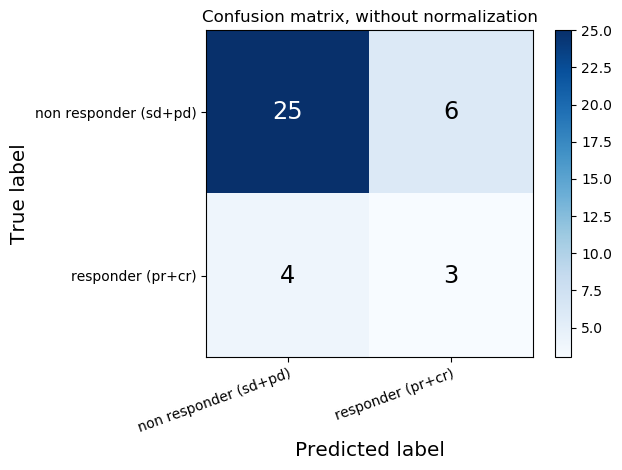

In [33]:
response_labels = ['non responder (sd+pd)', 'responder (pr+cr)']
plot_confusion_matrix(y_true, y_pred, classes=response_labels)

In [21]:
pos_label = 'non responder (sd+pd)'
# pos_label_index = np.argwhere(rf_freeman.classes_ == pos_label)[0][0]
p = rf_Freeman.predict_proba(X_test)[:, pos_label_index]

fpr, tpr, thresholds = roc_curve(y_true, p, pos_label=pos_label)

NameError: name 'pos_label_index' is not defined

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel(r'$r_{\mathrm{FP}}$')
plt.ylabel(r'$r_{\mathrm{TP}}$')

In [ ]:
# We evaluate the predictive capacity using AUC of ROC.
from sklearn.preprocessing import LabelBinarizer
def auc(y_true, y_pred):
    l = LabelBinarizer().fit(y_true)
    return roc_auc_score(l.transform(y_true), l.transform(y_pred), average='weighted')

In [ ]:
auc(y_true, y_pred)